In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\hackathon\Datasets\electricity_data.csv")
df.head()

,Date,Total_Consumption
0,2019-12-16,5.7
1,2019-12-17,20.6
2,2019-12-18,12.9
3,2019-12-19,15.5
4,2019-12-20,12.0


In [3]:
df.shape

(1313, 2)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.year == 2023]
df.reset_index(drop=True, inplace=True)
#filtered the data to year 2021 only 

In [5]:
df.head(3)

,Date,Total_Consumption
0,2023-01-01,7.7
1,2023-01-02,8.5
2,2023-01-03,7.7


In [6]:
df.shape

(203, 2)

In [7]:
#SARIMA 
# SARIMA stands for Seasonal AutoRegressive Integrated Moving Average. 
# It is a time series forecasting model that extends the ARIMA (AutoRegressive Integrated Moving Average) model to handle seasonality.
# SARIMA models are particularly useful for time series data that exhibit patterns or trends 
# that repeat over fixed intervals, known as seasonality.
#USED FOR TIME SERIES DATA

In [8]:
# why sarima over arima?
# In addition to the ARIMA components, SARIMA includes a seasonal component to capture periodic patterns.
# This is especially useful when dealing with data that exhibits repeating patterns at fixed intervals, 
# such as daily, monthly, or yearly seasonality.

In [9]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt

actual_vals = df.Total_Consumption.values
actual_log = np.log10(actual_vals)
#we took log for Logarithmic transformation in time series analysis stabilizes variance, normalizes skewed distributions, and facilitates modeling.
train, test = actual_vals[0:-80], actual_vals[-80:]
train_log, test_log = np.log10(train), np.log10(test)
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 7)
#7, indicating a weekly seasonality.

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

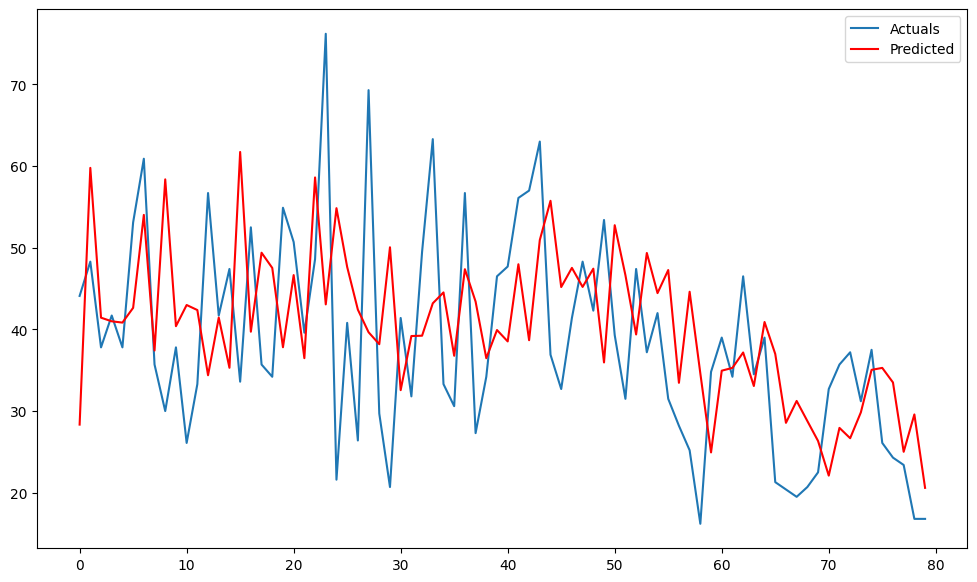

In [10]:
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    #history set of log of consumption values= of which we have to plot the time series forcast
    model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
   # print('predicted=%f, expected=%f' % (output[0], obs))
#error = math.sqrt(mean_squared_error(test_log, predict_log))
#print('Test rmse: %.3f' % error)
# plot
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [11]:
df.head()

,Date,Total_Consumption
0,2023-01-01,7.7
1,2023-01-02,8.5
2,2023-01-03,7.7
3,2023-01-04,9.3
4,2023-01-05,12.5


In [34]:
df_preds = df[-80:]
#taking last 80 columns for prediction
df_preds

,Date,Total_Consumption
123,2021-05-09,44.1
124,2021-05-10,48.3
125,2021-05-11,37.8
126,2021-05-13,41.7
127,2021-05-14,37.8
...,...,...
198,2021-07-26,26.1
199,2021-07-27,24.3
200,2021-07-28,23.4
201,2021-07-29,16.8


In [36]:
df_preds['Predicted_Consumption'] = predictions
df_preds


,Date,Total_Consumption,Predicted_Consumption
123,2021-05-09,44.1,28.343551
124,2021-05-10,48.3,59.780042
125,2021-05-11,37.8,41.435083
126,2021-05-13,41.7,40.993087
127,2021-05-14,37.8,40.834574
...,...,...,...
198,2021-07-26,26.1,35.287548
199,2021-07-27,24.3,33.504006
200,2021-07-28,23.4,25.013618
201,2021-07-29,16.8,29.588663


In [39]:
import plotly.graph_objects as go
import plotly.offline as py
#plotly for interactive and dynamic graph

# Plotly is preferred over Matplotlib when interactive and dynamic visualizations with online sharing 
# and collaboration features are crucial, as Plotly excels in creating interactive plots with built-in support 
# for online sharing, 
# while Matplotlib is primarily designed for static, publication-quality plots.

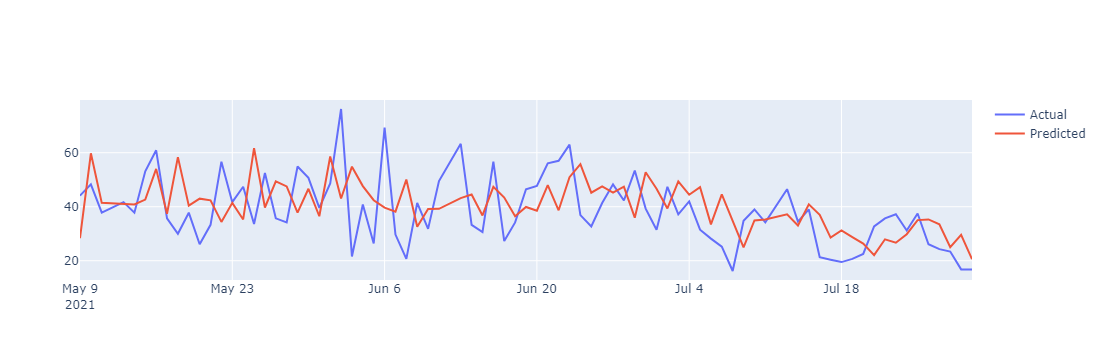

In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_preds['Date'], y=df_preds['Total_Consumption'],
                    mode='lines',
                    name='Actual'))
fig.add_trace(go.Scatter(x=df_preds['Date'], y=df_preds['Predicted_Consumption'],
                    mode='lines',
                    name='Predicted'))

In [55]:
new_dates = pd.date_range(start='2021/07/31', end='2021/09/30')

In [56]:
train = df.Total_Consumption.values
train.shape

(203,)

In [57]:
train = df.Total_Consumption.values

my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 62)

model = sm.tsa.SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit()
output = model_fit.forecast(62)

In [58]:
listofzeros = [np.NaN] * 62
#Creating a list named listofzeros with 62 elements, each initialized to np.NaN, 
#often used as a placeholder for missing or undefined values in time series data.


In [83]:
data_new = {'Date':new_dates,
            'Total_Consumption':listofzeros,
            'Predicted_Consumption':output}

df_new_preds = pd.DataFrame(data_new)
df_new_preds.head()

,Date,Total_Consumption,Predicted_Consumption
0,2021-07-31,NaN,15.104174
1,2021-08-01,NaN,30.825409
2,2021-08-02,NaN,34.155800
3,2021-08-03,NaN,37.358920
4,2021-08-04,NaN,25.388435


In [65]:
df_preds

,Date,Total_Consumption,Predicted_Consumption
123,2021-05-09,44.1,28.343551
124,2021-05-10,48.3,59.780042
125,2021-05-11,37.8,41.435083
126,2021-05-13,41.7,40.993087
127,2021-05-14,37.8,40.834574
...,...,...,...
198,2021-07-26,26.1,35.287548
199,2021-07-27,24.3,33.504006
200,2021-07-28,23.4,25.013618
201,2021-07-29,16.8,29.588663


In [67]:
df_all = pd.concat([df_preds, df_new_preds], ignore_index=True)

In [85]:
df_all.shape

(142, 4)

In [68]:
df_all.head()

,Date,Total_Consumption,Predicted_Consumption
0,2021-05-09,44.1,28.343551
1,2021-05-10,48.3,59.780042
2,2021-05-11,37.8,41.435083
3,2021-05-13,41.7,40.993087
4,2021-05-14,37.8,40.834574


In [69]:
df_all.tail()

,Date,Total_Consumption,Predicted_Consumption
137,2021-09-26,NaN,20.260183
138,2021-09-27,NaN,20.475118
139,2021-09-28,NaN,12.242142
140,2021-09-29,NaN,18.179106
141,2021-09-30,NaN,8.335533


In [77]:
df_all['MAE'] = df_all['Total_Consumption'] - df_all['Predicted_Consumption']
df_all['MAE']

0      15.756449
1     -11.480042
2      -3.635083
3       0.706913
4      -3.034574
         ...    
137          NaN
138          NaN
139          NaN
140          NaN
141          NaN
Name: MAE, Length: 142, dtype: float64

In [75]:
df_anoms = df_all[df_all['MAE'] >= 15]
df_anoms.reset_index(drop=True, inplace=True)

In [76]:
df_anoms.head()

,Date,Total_Consumption,Predicted_Consumption,MAE
0,2021-05-09,44.1,28.343551,15.756449
1,2021-05-22,56.7,34.386567,22.313433
2,2021-05-29,54.9,37.818107,17.081893
3,2021-06-02,76.2,43.064669,33.135331
4,2021-06-06,69.3,39.652523,29.647477


In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_all['Date'], y=df_all['Total_Consumption'],
                    mode='lines',
                    name='Actual Consumption'))
fig.add_trace(go.Scatter(x=df_all['Date'], y=df_all['Predicted_Consumption'],
                    mode='lines',
                    name='Forecasted Consumption'))
fig.add_trace(go.Scatter(x=df_anoms['Date'], y=df_anoms['Total_Consumption'],
                    mode='markers',
                    name='Excess Consumption'))
fig.update_traces(marker=dict(size=5, 
                              line=dict(width=5,
                                        color='red')))

In [20]:
# import smtplib, ssl
# from smtplib import SMTPException
# from pathlib import Path
# from email.mime.multipart import MIMEMultipart
# from email.mime.base import MIMEBase
# from email.mime.text import MIMEText
# from email.utils import COMMASPACE, formatdate
# from email import encoders
# import plotly
# import datetime

# for i in df_anoms['Date']:
#     fig = go.Figure()
#     df_anoms_temp = df_anoms[df_anoms['Date'] == i]
#     df_anoms_temp.reset_index(drop=True, inplace=True)
#     df_all_temp = df_all[df_all['Date'] <= i + datetime.timedelta(days=1)]
#     df_all_temp.reset_index(drop=True, inplace=True)
#     fig.add_trace(go.Scatter(x=df_all_temp['Date'], y=df_all_temp['Total_Consumption'],
#                         mode='lines',
#                         name='Actual Consumption'))
#     fig.add_trace(go.Scatter(x=df_all_temp['Date'], y=df_all_temp['Predicted_Consumption'],
#                         mode='lines',
#                         name='Forecasted Consumption'))
#     fig.add_trace(go.Scatter(x=df_anoms_temp['Date'], y=df_anoms_temp['Total_Consumption'],
#                         mode='markers',
#                         name='Excess Consumption'))
#     fig.update_traces(marker=dict(size=5, 
#                                   line=dict(width=5,
#                                             color='red')))
#     i = str(i)
#     i = i[:-9]
#     plotly.io.write_image(fig, 'output_file'+i+'.pdf', format='pdf')
#     SUBJECT = "Early Warning - Abnormal usage of Electricity Detected! - Dated:" + i

#     msg = MIMEMultipart()
#     msg['Subject'] = SUBJECT 
#     msg['From'] = 'debadriworkshop@gmail.com'
#     msg['To'] = 'debadridtt@gmail.com'

#     body = "Electra.AI has detected unusal usage of electricity. This is an early warning generated to keep the electricity bill under control."

#     msg.attach(MIMEText(body, 'plain'))

#     filename = 'output_file'+i+'.pdf'
#     attachment = open('output_file'+i+'.pdf', "rb")

#     part = MIMEBase('application', "octet-stream")
#     part.set_payload((attachment).read())
#     encoders.encode_base64(part)

#     part.add_header('Content-Disposition', "attachment; filename= %s" % filename)

#     msg.attach(part)
#     context = ssl.create_default_context()
#     server = smtplib.SMTP('smtp.gmail.com', 587)
#     server.ehlo()
#     server.starttls(context=context)
#     server.ehlo()
#     server.login(msg['From'], '********')
#     server.sendmail(msg['From'], msg['To'], msg.as_string())
#     print('Email sent successfully for Date:', i)

Email sent successfully for Date: 2021-05-09
Email sent successfully for Date: 2021-05-22
Email sent successfully for Date: 2021-05-29
Email sent successfully for Date: 2021-06-02
Email sent successfully for Date: 2021-06-06
Email sent successfully for Date: 2021-06-13
Email sent successfully for Date: 2021-06-22
Email sent successfully for Date: 2021-06-29


In [21]:
# plotly.io.write_image(fig, 'output_file.pdf', format='pdf')

In [22]:
# import smtplib, ssl
# from smtplib import SMTPException
# from pathlib import Path
# from email.mime.multipart import MIMEMultipart
# from email.mime.base import MIMEBase
# from email.mime.text import MIMEText
# from email.utils import COMMASPACE, formatdate
# from email import encoders

In [23]:
# sender = 'debadriworkshop@gmail.com'
# receivers = ['debadridtt@gmail.com']

# message = """From: debadriworkshop@gmail.com
# To: debadridtt@gmail.com
# Subject: Early Warning - Abnormal usage of Electricity Detected! - Dated: {date}

# Electra.AI has detected unusal usage of electricity. This is an early warning generated to keep the electricity bill under control.
# """

# context = ssl.create_default_context()

# try:
#     smtpObj = smtplib.SMTP('smtp.gmail.com', 587)
#     smtpObj.ehlo()
#     smtpObj.starttls(context=context)
#     smtpObj.ehlo()
#     smtpObj.login(sender, 'gta4vicecity')
#     smtpObj.sendmail(sender, receivers, message)     
#     print ("Successfully sent email")
# except SMTPException:
#     print ("Error: unable to send email")

In [24]:
# SUBJECT = "Early Warning - Abnormal usage of Electricity Detected! - Dated: {date}"

# msg = MIMEMultipart()
# msg['Subject'] = SUBJECT 
# msg['From'] = 'debadriworkshp@gmail.com'
# msg['To'] = 'debadridtt@gmail.com'

# body = "Electra.AI has detected unusal usage of electricity. This is an early warning generated to keep the electricity bill under control."

# msg.attach(MIMEText(body, 'plain'))

# filename = "output_file.pdf"
# attachment = open("output_file.pdf", "rb")

# part = MIMEBase('application', "octet-stream")
# part.set_payload((attachment).read())
# encoders.encode_base64(part)
    
# part.add_header('Content-Disposition', "attachment; filename= %s" % filename)

# msg.attach(part)

# server = smtplib.SMTP('smtp.gmail.com', 587)
# server.ehlo()
# server.starttls(context=context)
# server.ehlo()
# server.login(sender, 'gta4vicecity')
# server.sendmail(msg['From'], msg['To'], msg.as_string())

In [25]:
# df_all.to_csv(r'D:\Skills\Challenges\Mitsubishi PropTech\Datasets\electrical_forecast.csv', index=False)